# Web Mining and Applied NLP (44-620)

## Requests, JSON, and NLP

### Student Name: Philip Fowler

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

Make sure you have [installed spaCy and its pipeline](https://spacy.io/usage#quickstart) and [spaCyTextBlob](https://spacy.io/universe/project/spacy-textblob)

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

This assignment requires that you write additional files (either JSON or pickle files); make sure to submit those files in your repository as well.

1. The following code accesses the [lyrics.ovh](https://lyricsovh.docs.apiary.io/#reference/0/lyrics-of-a-song/search) public api, searches for the lyrics of a song, and stores it in a dictionary object.  Write the resulting json to a file (either a JSON file or a pickle file; you choose). You will read in the contents of this file for future questions so we do not need to frequently access the API.

In [52]:
import requests
import json
import spacy
import spacytextblob
import os
from spacytextblob.spacytextblob import SpacyTextBlob
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob', last=True)

result = json.loads(requests.get('https://api.lyrics.ovh/v1/They Might Be Giants/Birdhouse in your soul').text)


2. Read in the contents of your file.  Print the lyrics of the song (not the entire dictionary!) and use spaCyTextBlob to perform sentiment analysis on the lyrics.  Print the polarity score of the sentiment analysis.  Given that the range of the polarity score is `[-1.0,1.0]` which corresponds to how positive or negative the text in question is, do you think the lyrics have a more positive or negative connotaion?  Answer this question in a comment in your code cell.

In [53]:
def analyze_sentiment(text):
    doc = nlp(text)
    polarity_score = doc._.blob.polarity  # Access polarity from the TextBlob object
    
    # Determine connotation
    if polarity_score < 0:
        connotation = "negative"
    elif polarity_score > 0:
        connotation = "positive"
    else:
        connotation = "neutral"
    
    # Output statement
    print(f"The polarity score is {polarity_score} and it has a {connotation} connotation.")

# Example usage
analyze_sentiment(result['lyrics'])

The polarity score is 0.04505208333333333 and it has a positive connotation.


In [54]:
# Here are the lyrics because I didn't include them in the above function.
print(result['lyrics'])

I'm your only friend 
I'm not your only friend 
But I'm a little glowing friend 
But really I'm not actually your friend 
But I am 


Blue canary in the outlet by the light switch 

Who watches over you 

Make a little birdhouse in your soul 

Not to put too fine a point on it 

Say I'm the only bee in your bonnet 

Make a little birdhouse in your soul 



I have a secret to tell 

From my electrical well 

It's a simple message and I'm leaving out the whistles and bells 

So the room must listen to me 

Filibuster vigilantly 

My name is blue canary one note* spelled l-i-t-e 

My story's infinite 

Like the Longines Symphonette it doesn't rest 



Blue canary in the outlet by the light switch 

Who watches over you 

Make a little birdhouse in your soul 

Not to put too fine a point on it 

Say I'm the only bee in your bonnet 

Make a little birdhouse in your soul 



I'm your only friend 

I'm not your only friend 

But I'm a little glowing friend 

But really I'm not actually your f

3. Write a function that takes an artist, song, and filename, accesses the lyrics.ovh api to get the song lyrics, and writes the results to the specified filename.  Test this function by getting the lyrics to any four songs of your choice and storing them in different files.

In [ ]:

# Get lyrics from API
def get_lyrics(artist, song):
    filename = f"{artist}_{song}.txt"
    if os.path.exists(filename):
        with open(filename, "r") as file:
            return file.read()
    else:
        response = requests.get(f'https://api.lyrics.ovh/v1/{artist}/{song}')
        if response.status_code == 200:
            lyrics = json.loads(response.text)['lyrics']
            with open(filename, "w") as file:
                file.write(lyrics)
            return lyrics
        else:
            return None

# List of songs to analyze
songs = [
    ("Taylor Swift", "Shake It Off"),
    ("Marilyn Manson", "Personal Jesus"),
    ("Mark Ronson", "Uptown Funk"),
    ("Bobby McFerrin", "Don't Worry Be Happy"),
    ("Morgan Wallen", "Last Night")
]

# Make the list available to the next cell
%store songs

# Save the lyrics to a file and print the location of the txt file
def save_lyrics_to_file(artist, song, lyrics):
    filename = f"{artist}_{song}.txt"
    with open(filename, "w") as file:
        file.write(lyrics)
    print(f"Lyrics saved to {filename}")

# Print the first 8 lines of the lyrics below and save all lyrics to a txt file
for artist, song in songs:
    lyrics = get_lyrics(artist, song)
    if lyrics:
        print(f"Lyrics for {song} by {artist}:")
        print("\n".join(lyrics.split("\n")[:8]))
        print("\n")
        save_lyrics_to_file(artist, song, lyrics)
    else:
        print(f"Lyrics for {song} by {artist} not found.")
        print("\n")

Stored 'songs' (list)
Lyrics for Shake It Off by Taylor Swift:
I stay out too late

Got nothing in my brain

That's what people say

That's what people say



Lyrics saved to Taylor Swift_Shake It Off.txt
Lyrics for Personal Jesus by Marilyn Manson:
Your own personal jesus

Someone to hear your prayers

Someone who cares

Your own personal jesus



Lyrics saved to Marilyn Manson_Personal Jesus.txt
Lyrics for Uptown Funk by Mark Ronson:
This hit, that ice cold
Michelle Pfeiffer, that white gold
This one, for them hood girls
Them good girls
Straight masterpieces
Stylin', wilin'

Livin' it up in the city


Lyrics saved to Mark Ronson_Uptown Funk.txt
Lyrics for Don't Worry Be Happy by Bobby McFerrin:
Here's a little song i wrote,

You might want to sing it note for note,

Don't worry, be happy

In every life we have some trouble,



Lyrics saved to Bobby McFerrin_Don't Worry Be Happy.txt


d:\NWMissouri\44620 Web Mining\json-sentiment-philip\.venv\Lib\site-packages\IPython\extensions\storemagic.py:229: UserWarning: This is now an optional IPython functionality, setting autorestore/songs requires you to install the `pickleshare` library.
  db[ 'autorestore/' + arg ] = obj


Lyrics for Last Night by Morgan Wallen:
Last night we let the liquor talk
I can't remember everything we said but we said it all
You told me that you wish I was somebody you never met
But baby, baby somethin's tellin' me this ain't over yet
No way it was our last night

I kiss your lips



Lyrics saved to Morgan Wallen_Last Night.txt


4. Write a function that takes the name of a file that contains song lyrics, loads the file, performs sentiment analysis, and returns the polarity score.  Use this function to print the polarity scores (with the name of the song) of the three files you created in question 3.  Does the reported polarity match your understanding of the song's lyrics? Why or why not do you think that might be?  Answer the questions in either a comment in the code cell or a markdown cell under the code cell.

In [65]:
# Get lyrics from API
def get_lyrics(artist, song):
    filename = f"{artist}_{song}.txt"
    if os.path.exists(filename):
        with open(filename, "r") as file:
            return file.read()
    else:
        response = requests.get(f'https://api.lyrics.ovh/v1/{artist}/{song}')
        if response.status_code == 200:
            lyrics = json.loads(response.text)['lyrics']
            with open(filename, "w") as file:
                file.write(lyrics)
            return lyrics
        else:
            return None

# Using the song list from the previous cell

# Analyze sentiment for each song
for artist, song in songs:
    lyrics = get_lyrics(artist, song)
    if lyrics:
        print(f"Analyzing sentiment for '{song}' by {artist}:")
        analyze_sentiment(lyrics)
        print("\n")
    else:
        print(f"Could not fetch lyrics for '{song}' by {artist}.")

Analyzing sentiment for 'Shake It Off' by Taylor Swift:
The polarity score is -0.47116745688174266 and it has a negative connotation.


Analyzing sentiment for 'Personal Jesus' by Marilyn Manson:
The polarity score is 0.26666666666666666 and it has a positive connotation.


Analyzing sentiment for 'Uptown Funk' by Mark Ronson:
The polarity score is 0.21557697563014402 and it has a positive connotation.


Analyzing sentiment for 'Don't Worry Be Happy' by Bobby McFerrin:
The polarity score is 0.539105902777778 and it has a positive connotation.


Analyzing sentiment for 'Last Night' by Morgan Wallen:
The polarity score is 0.06639030612244898 and it has a positive connotation.




4 (continued) Does the reported polarity match your understanding of the song's lyrics? Why or why not do you think that might be?  Answer the questions in either a comment in the code cell or a markdown cell under the code cell.

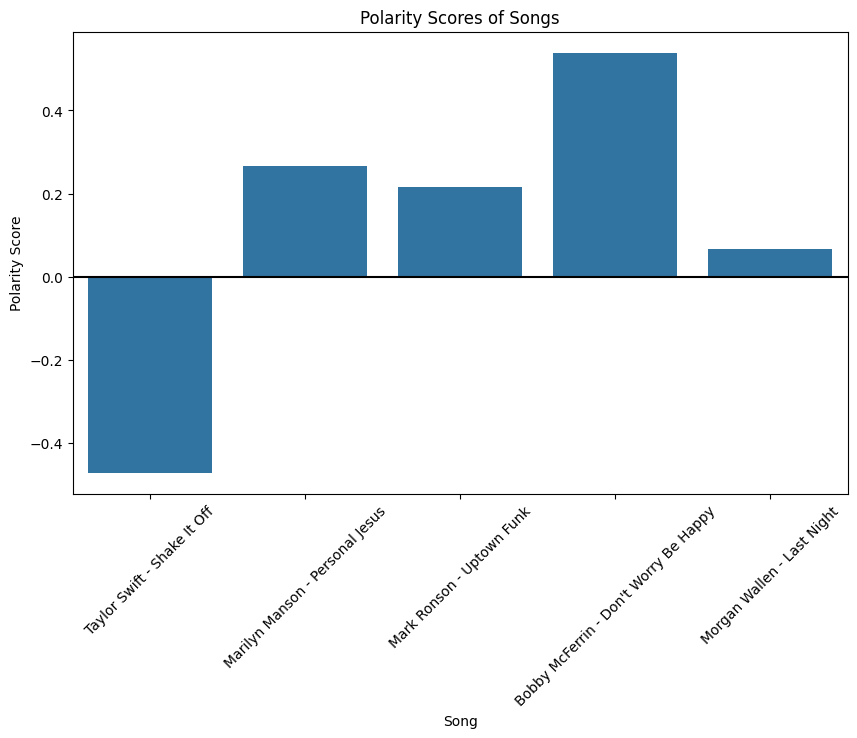

In [ ]:

# Function to get polarity score
def get_polarity_score(lyrics):
    doc = nlp(lyrics)
    return doc._.blob.polarity

# Using the song list from the previous cell

# Calculate polarity scores
polarity_scores = []
for artist, song in songs:
    lyrics = get_lyrics(artist, song)
    if lyrics:
        polarity_scores.append((song, get_polarity_score(lyrics)))

# Create a DataFrame for plotting
df = pd.DataFrame(polarity_scores, columns=['Song', 'Polarity Score'])
# Plot the bar chart with artist and song as x tick labels
plt.figure(figsize=(10, 6))
sns.barplot(x='Song', y='Polarity Score', data=df)
plt.axhline(0, color='black', linestyle='-')  
plt.title('Polarity Scores of Songs')
plt.xlabel('Song')
plt.ylabel('Polarity Score')
plt.xticks(ticks=range(len(songs)), labels=[f"{artist} - {song}" for artist, song in songs], rotation=45)
plt.show()


I chose to put the sentiment analysis in a graph as my brain works better that way.  The Taylor Swift and Morgan Wallen Songs were suggested by my 16 year old niece.  She is the closest thing that I have to an expert on Morgan Wallen and Taylor Swift.  I didn't expect to see Taylor Swift's negative score though.  The song, as I read the lyrics, is about empowerment and moving on from a negative experience.  I am not surprised by positive score for Bobby McFerrin's song. 

Do other sentiment analysis tools score this the same way?  

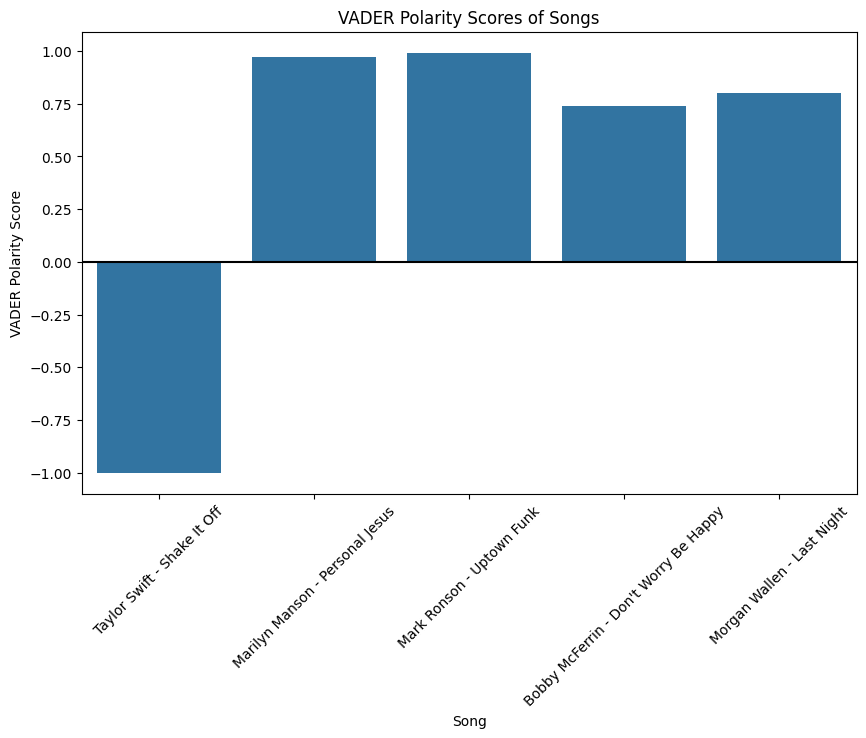

In [66]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize the VADER sentiment analyzer
vader_analyzer = SentimentIntensityAnalyzer()

# Function to get VADER polarity score
def get_vader_polarity_score(lyrics):
    vader_scores = vader_analyzer.polarity_scores(lyrics)
    return vader_scores['compound']  # Compound score is the overall sentiment score

# Calculate VADER polarity scores
vader_polarity_scores = []
for artist, song in songs:
    lyrics = get_lyrics(artist, song)
    if lyrics:
        vader_polarity_scores.append((song, get_vader_polarity_score(lyrics)))

# Create a DataFrame for plotting VADER scores
vader_df = pd.DataFrame(vader_polarity_scores, columns=['Song', 'VADER Polarity Score'])

# Plot the bar chart with artist and song as x tick labels for VADER scores
plt.figure(figsize=(10, 6))
sns.barplot(x='Song', y='VADER Polarity Score', data=vader_df)
plt.axhline(0, color='black', linestyle='-')  
plt.title('VADER Polarity Scores of Songs')
plt.xlabel('Song')
plt.ylabel('VADER Polarity Score')
plt.xticks(ticks=range(len(songs)), labels=[f"{artist} - {song}" for artist, song in songs], rotation=45)
plt.show()

I doubt that the magnitude of the polarity scores between vader and spacytextblob are directly comparable.  However, it is interesting to see that Taylor swift still rates a negative outcome whereas the other four songs are positive.  Interestingly, with spacytextblob, Bobby McFerrin was much higher than the other four songs.  However, with vader we see McFerrin's song as the lowest of the four.